# Introduction to Convolutional Neural Networks and Computer Vision With Tensorflow

Computer vision is the practice of writing algorithm which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

# Get the data

kaggle pr 101 classes of food ka hai pr
humne modify krkr usko sirf 2 classes ke liye kiya hai (pizza r steak)

**Note**-> We start the smaller dataset so we can experiment quickly and figure what works(or better yet what doesn't work)

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-10-13 16:24:57--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 74.125.137.207, 142.250.101.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   117MB/s    in 0.9s    

2024-10-13 16:24:58 (117 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data(become one with it)

A very crucial step at the begining of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.

In [ ]:
! ls pizza_steak

test  train


In [ ]:
! ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/pizza

1008104.jpg  1572608.jpg  2097315.jpg  2572958.jpg  3084957.jpg  3693710.jpg  668944.jpg
1008144.jpg  1573562.jpg  2098014.jpg  2574896.jpg  3102271.jpg  3699992.jpg  670201.jpg
1008844.jpg  1576248.jpg  2104569.jpg  2576168.jpg  3105724.jpg  3702863.jpg  674188.jpg
1008941.jpg  1577871.jpg  2110257.jpg  2577373.jpg  3109486.jpg  3703769.jpg  676432.jpg
1011404.jpg  1584379.jpg  2112757.jpg  2577377.jpg  312479.jpg	 3704879.jpg  682201.jpg
102037.jpg   1593665.jpg  2121603.jpg  2581276.jpg  3128495.jpg  3705479.jpg  68684.jpg
1026922.jpg  1593835.jpg  2126352.jpg  2584745.jpg  3148119.jpg  370643.jpg   698251.jpg
1029698.jpg  1600705.jpg  2126709.jpg  2587918.jpg  3164761.jpg  3712344.jpg  702165.jpg
1033251.jpg  1608000.jpg  2135635.jpg  2587921.jpg  3168266.jpg  3713343.jpg  704161.jpg
1035854.jpg  1617418.jpg  2137341.jpg  259449.jpg   3170114.jpg  372275.jpg   709273.jpg
1038357.jpg  1620560.jpg  2142812.jpg  2602611.jpg  3173779.jpg  3742272.jpg  709947.jpg
1040878.jpg  1620761.jp

In [ ]:
import os
# walk through pizza_steak directory and list number of files
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and  {len(filenames)} images in '{dirpath}'.")

There are 2 directories and  0 images in 'pizza_steak'.
There are 2 directories and  0 images in 'pizza_steak/train'.
There are 0 directories and  750 images in 'pizza_steak/train/pizza'.
There are 0 directories and  750 images in 'pizza_steak/train/steak'.
There are 2 directories and  0 images in 'pizza_steak/test'.
There are 0 directories and  250 images in 'pizza_steak/test/pizza'.
There are 0 directories and  250 images in 'pizza_steak/test/steak'.


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train=len(os.listdir("pizza_steak/train/steak"))

In [ ]:
num_steak_images_train

750

In [ ]:
num_pizza_images_train=len(os.listdir('pizza_steak/train/pizza'))

In [ ]:
num_pizza_images_train

750

TO visualize our images,first let's get the classes names programatically

In [ ]:
# get the classnames programatically
import pathlib
import numpy as np
data_dir=pathlib.Path('pizza_steak/train')
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
# Created a list of class_names from the subdirector
print(class_names)

['pizza' 'steak']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  # setup the target directory (we'll view images from here)
  target_folder=target_dir+ '/'+target_class
  # Get a random image path
  random_image=random.sample(os.listdir(target_folder),1)
  # Read the image and plot it using matplotlib
  img=mpimg.imread(target_folder+'/'+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis(False)

  print(f"Image shape :{img.shape}")
  return img

Image shape :(384, 512, 3)


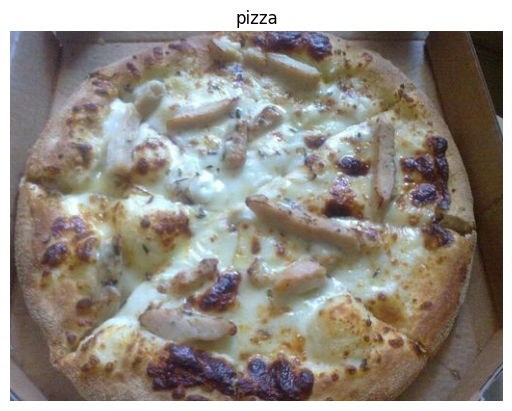

In [ ]:
img=view_random_image(target_dir='pizza_steak/train',
                  target_class='pizza')

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[136, 148, 172],
        [133, 148, 171],
        [133, 148, 171],
        ...,
        [ 39,  35,  23],
        [ 36,  32,  20],
        [ 31,  27,  15]],

       [[142, 154, 178],
        [137, 152, 175],
        [134, 149, 172],
        ...,
        [ 38,  34,  22],
        [ 38,  34,  22],
        [ 36,  32,  20]],

       [[141, 153, 179],
        [137, 151, 177],
        [134, 148, 174],
        ...,
        [ 39,  33,  19],
        [ 40,  34,  20],
        [ 41,  35,  21]],

       ...,

       [[ 85,  97, 111],
        [ 92, 105, 122],
        [106, 121, 142],
        ...,
        [ 83,  87,  90],
        [ 87,  92,  95],
        [ 92,  97, 100]],

       [[ 79,  93, 104],
        [ 80,  96, 109],
        [ 86, 103, 123],
        ...,
        [ 78,  82,  85],
        [ 83,  87,  90],
        [ 88,  92,  95]],

       [[ 86, 100, 109],
        [ 84, 100, 113],
        [ 81,  98, 116],
        ...,
        [ 81,  85,  8

In [ ]:
#View the image shape
img.shape # Return height , width, color channel

(384, 512, 3)

In [ ]:
#Get all the pixel value b/w 0 and 1
img/255.0

array([[[0.53333333, 0.58039216, 0.6745098 ],
        [0.52156863, 0.58039216, 0.67058824],
        [0.52156863, 0.58039216, 0.67058824],
        ...,
        [0.15294118, 0.1372549 , 0.09019608],
        [0.14117647, 0.1254902 , 0.07843137],
        [0.12156863, 0.10588235, 0.05882353]],

       [[0.55686275, 0.60392157, 0.69803922],
        [0.5372549 , 0.59607843, 0.68627451],
        [0.5254902 , 0.58431373, 0.6745098 ],
        ...,
        [0.14901961, 0.13333333, 0.08627451],
        [0.14901961, 0.13333333, 0.08627451],
        [0.14117647, 0.1254902 , 0.07843137]],

       [[0.55294118, 0.6       , 0.70196078],
        [0.5372549 , 0.59215686, 0.69411765],
        [0.5254902 , 0.58039216, 0.68235294],
        ...,
        [0.15294118, 0.12941176, 0.0745098 ],
        [0.15686275, 0.13333333, 0.07843137],
        [0.16078431, 0.1372549 , 0.08235294]],

       ...,

       [[0.33333333, 0.38039216, 0.43529412],
        [0.36078431, 0.41176471, 0.47843137],
        [0.41568627, 0

**Note** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale (also reffered to as normalize ) their pixel values by dividing the image arrays by 225 (since 225 the maximum pixel value)

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* load our images
* Preprocess our images
* Build a Cnn to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data



In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# set the seed
tf.random.set_seed(42)

# Preprocess data(get all of the pixel values b/w 0 & 1 ,also called scaling/normalization)
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)
# Setup path to our data directory
train_dir='/content/pizza_steak/train'
test_dir='/content/pizza_steak/test'
# Import data from directories and turn it into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             seed=42)
valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             seed=42)



# BUild a Cnn model (same as the Tiny VGG on the CNN explainer website)
model_1=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
#Compile our CNN
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
# Fit the model
# The issue was the validation steps were higher than the number of samples in the test set
# By setting it to  len(valid_data) it is ensured there are proper no of steps for validation
print("Number of validation steps:", len(valid_data))
validation_steps = min(len(valid_data), 10)
history_1=model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=validation_steps) # Ensure the validation_steps is set correctly

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Number of validation steps: 16


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 277ms/step - accuracy: 0.6249 - loss: 0.6411 - val_accuracy: 0.8219 - val_loss: 0.3990
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8500 - val_loss: 0.3761
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 96ms/step - accuracy: 0.8116 - loss: 0.4460 - val_accuracy: 0.7688 - val_loss: 0.4505
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8056 - val_loss: 0.4510
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.8001 - loss: 0.4267 - val_accuracy: 0.8656 - val_loss: 0.3496


In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

In [ ]:
len(train_data)

47

<Axes: >

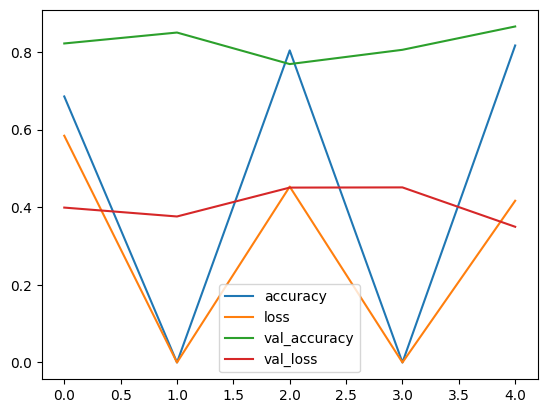

In [ ]:
import pandas as pd
pd.DataFrame(history_1.history).plot()

In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

### Using the same model

Let's replicate the model we've built in a previous section to see if it works with our image data.

In [ ]:
#set random seed
tf.random.set_seed(42)
# Create a model to replicate the Tensorflow Playground model
model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy']
                )
validation_steps = min(len(valid_data), 10)
history_2=model_2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=validation_steps)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - accuracy: 0.4773 - loss: 1.0106 - val_accuracy: 0.4938 - val_loss: 0.6932
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5111 - val_loss: 0.6931
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - accuracy: 0.4850 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4611 - val_loss: 0.6932
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.4800 - loss: 0.6932 - val_accuracy: 0.4875 - val_loss: 0.6932


Despite having 20X more paramters than our CNN(model_1) model_2 performs terribly.... let's try to improve it..

In [ ]:
model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
validation_steps=min(10,len(valid_data))

history_3=model_3.fit(train_data,epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=validation_steps)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 135ms/step - accuracy: 0.5569 - loss: 3.8256 - val_accuracy: 0.7656 - val_loss: 1.0021
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7889 - val_loss: 1.2142
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.7097 - loss: 1.3965 - val_accuracy: 0.7969 - val_loss: 0.4014
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8056 - val_loss: 0.4010
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - accuracy: 0.7217 - loss: 0.7027 - val_accuracy: 0.7937 - val_loss: 0.5574


In [ ]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

## Binary Classification: Let's break it down

1. Become one with the data(visualize,visualize)

2. Preprocess the data (prepared it for our model,the main step here was scaling/normalizing & turning our data into batches)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model(try to beat our baseline)
7. Repeat until satisfied(exp,experiment)

1. Become one with the data

Image shape :(512, 512, 3)
Image shape :(512, 512, 3)


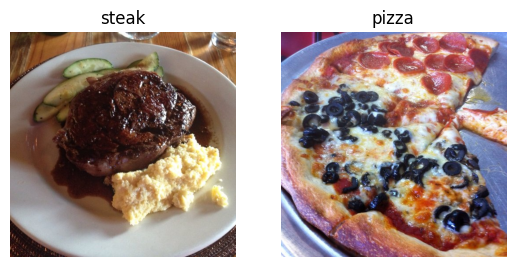

In [ ]:
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image(target_dir='pizza_steak/train',
                  target_class='steak')
plt.subplot(1,2,2)
pizza_img=view_random_image(target_dir='pizza_steak/train',
                  target_class='pizza')

### Preprocess the data

In [ ]:
# Defien the directory dataset paths
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"

**Our Next step is to turn our data into batches**
 A batch is a small subset of data, Rather than look at all ~10000 images at one time , a model might only look at 32 at a time.

 it does this for a couple of reasons:
 1. 10,000 images (or more) might not fit into the memory of your processor(GPU).
 2. Trying to learn the patterns in 10,000 images in one hit could result in the model nto being able to learn very well.

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen= ImageDataGenerator(rescale=1/255.)

In [ ]:
train_datagen

In [ ]:
# Load in our image data from directories and turn them into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

test_data=test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images,labels=next(train_data)# get the next batch of images/labels in train_data
len(images),len(labels)

(32, 32)

In [ ]:
images[0]

array([[[0.54901963, 0.29411766, 0.1764706 ],
        [0.5568628 , 0.31764707, 0.19607845],
        [0.54901963, 0.31764707, 0.19215688],
        ...,
        [0.56078434, 0.2627451 , 0.05882353],
        [0.5803922 , 0.28235295, 0.08627451],
        [0.5921569 , 0.29411766, 0.09803922]],

       [[0.5019608 , 0.24705884, 0.13725491],
        [0.50980395, 0.25882354, 0.14901961],
        [0.5019608 , 0.27058825, 0.14509805],
        ...,
        [0.6156863 , 0.30588236, 0.08627451],
        [0.6313726 , 0.32156864, 0.10196079],
        [0.6313726 , 0.31764707, 0.10980393]],

       [[0.53333336, 0.28235295, 0.1764706 ],
        [0.52156866, 0.27058825, 0.16078432],
        [0.4784314 , 0.2392157 , 0.1254902 ],
        ...,
        [0.60784316, 0.28627452, 0.0509804 ],
        [0.6117647 , 0.2901961 , 0.0627451 ],
        [0.6156863 , 0.3019608 , 0.07058824]],

       ...,

       [[0.10196079, 0.04313726, 0.01568628],
        [0.09411766, 0.03529412, 0.00784314],
        [0.10196079, 0

In [ ]:
labels[0]

1.0

In [ ]:
len(train_data) # Means 47 batches we have because 1500/32

47

In [ ]:
1500/32

46.875

In [ ]:
# Get the first two images
images[:2],images[0].shape

(array([[[[0.54901963, 0.29411766, 0.1764706 ],
          [0.5568628 , 0.31764707, 0.19607845],
          [0.54901963, 0.31764707, 0.19215688],
          ...,
          [0.56078434, 0.2627451 , 0.05882353],
          [0.5803922 , 0.28235295, 0.08627451],
          [0.5921569 , 0.29411766, 0.09803922]],
 
         [[0.5019608 , 0.24705884, 0.13725491],
          [0.50980395, 0.25882354, 0.14901961],
          [0.5019608 , 0.27058825, 0.14509805],
          ...,
          [0.6156863 , 0.30588236, 0.08627451],
          [0.6313726 , 0.32156864, 0.10196079],
          [0.6313726 , 0.31764707, 0.10980393]],
 
         [[0.53333336, 0.28235295, 0.1764706 ],
          [0.52156866, 0.27058825, 0.16078432],
          [0.4784314 , 0.2392157 , 0.1254902 ],
          ...,
          [0.60784316, 0.28627452, 0.0509804 ],
          [0.6117647 , 0.2901961 , 0.0627451 ],
          [0.6156863 , 0.3019608 , 0.07058824]],
 
         ...,
 
         [[0.10196079, 0.04313726, 0.01568628],
          [0.09411

# Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when begining a machine learning experiment and then as you keep experimenting , you try to beat the baseline

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential


In [ ]:
# Create the model # this will be our baseline
model_4 =Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid", # if same then the output shape is same as the input shape,if valid then output shape gets compressed
           activation="relu",
           input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid")
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 218, 218, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 475240)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │         475,241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 477,341 (1.82 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
len(train_data),len(test_data)

(47, 16)

Here the training data is the combination of labels and sample data

In [ ]:
#Fit the model
valid_steps=min(10,len(test_data))
history_4=model_4.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=valid_steps)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 168ms/step - accuracy: 0.5096 - loss: 1.6478 - val_accuracy: 0.7500 - val_loss: 0.4818
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.4860
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.7644 - loss: 0.5236 - val_accuracy: 0.7500 - val_loss: 0.4908
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7944 - val_loss: 0.4416
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.7977 - loss: 0.4585 - val_accuracy: 0.8375 - val_loss: 0.3958


In [ ]:
model_1.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.8709 - loss: 0.3255


[0.34038305282592773, 0.8539999723434448]

In [ ]:
model_4.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.8333 - loss: 0.4041


[0.38808658719062805, 0.843999981880188]

<Axes: >

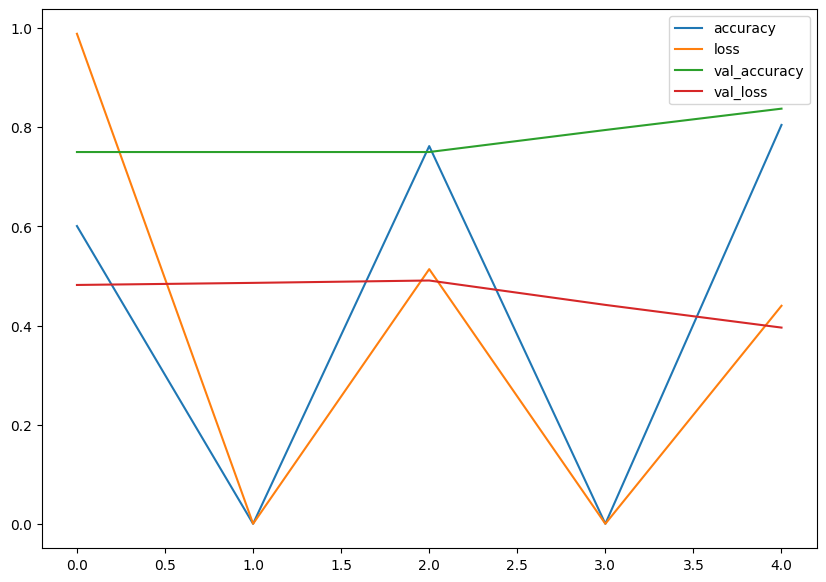

In [ ]:
# Let's evaluate our model using the plot curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [ ]:
# plot the validation and training curves seperately
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics
  """
  loss=history.history["loss"]
  val_loss=history.history["val_loss"]

  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]

  epochs=range(len(history.history["loss"]))

  # plot loss

  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="validation_loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()

  # plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="Val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

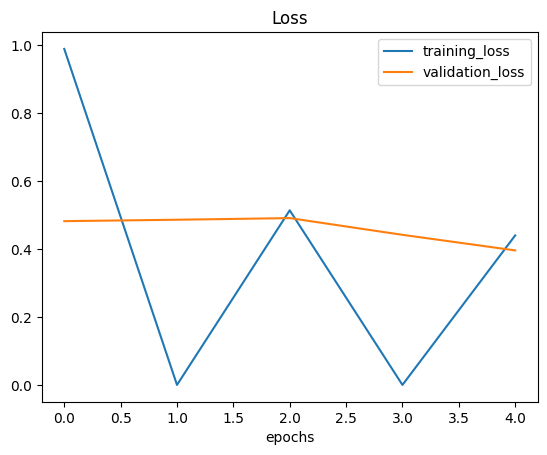

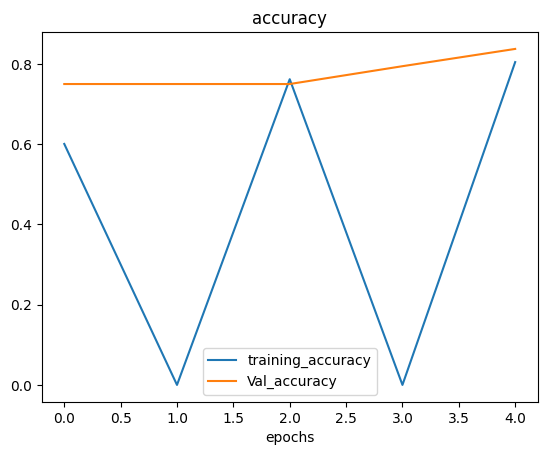

In [ ]:
plot_loss_curves(history_4)

**Note**: When a model's validation starts to increase as well much , it's likely that the model is **overfitting** , it means it's learning the training dataset too well and thus the model's ability to **generalize** to unseen data is diminished

##6. Adjust the model parameters

Fitting a machine model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model

2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv **layers**
* Increase the number of conv **filters**
* Add another dense layer to the output of our flattened layer

Ways to Reduce overfitting:
* Add Data augmentation
* Add regularization layers(such as MaxPool2D)
* Add more data

**Note**: Reducing overfitting is also known as **regularization**


In [ ]:
# Create the model (the new baseline)
model_5=tf.keras.Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
val_steps=min(len(valid_data),10)
history_5=model_5.fit(train_data,
            epochs=5,
             steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=val_steps)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 143ms/step - accuracy: 0.5970 - loss: 0.6636 - val_accuracy: 0.8125 - val_loss: 0.4847
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7556 - val_loss: 0.4884
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 103ms/step - accuracy: 0.7946 - loss: 0.4648 - val_accuracy: 0.8438 - val_loss: 0.3638
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8611 - val_loss: 0.3330
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.8287 - loss: 0.3849 - val_accuracy: 0.8656 - val_loss: 0.3419


In [ ]:
model_5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │           6,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

In [ ]:
model_5.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.8380 - loss: 0.3756


[0.3417342007160187, 0.8659999966621399]

In [ ]:
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 218, 218, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 475240)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │         475,241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,432,025 (5.46 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 954,684 (3.64 MB)

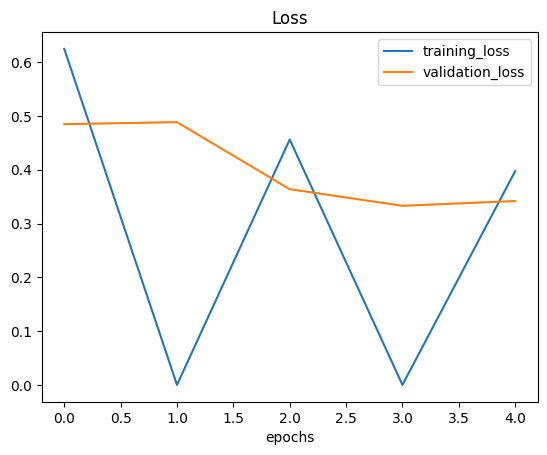

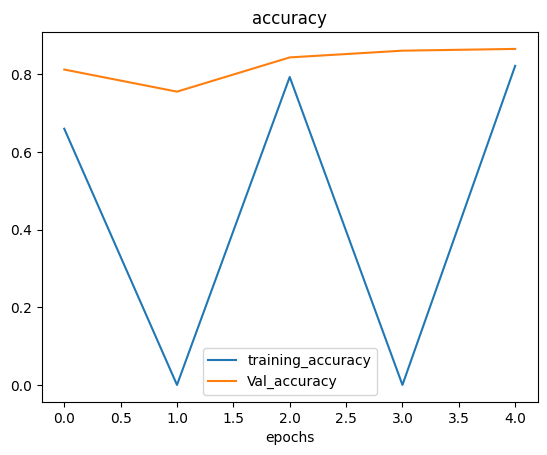

In [ ]:
plot_loss_curves(history_5)

## Opening our Bag of tricks and finding data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                           rotation_range=0.2,# How much do you want to rotate your image
                                           shear_range=0.2,# how much do you want to shear an image ?
                                           zoom_range=0.2,# zoom in randomly on an image
                                           width_shift_range=0.2,# move your image aroung on x-axis
                                           height_shift_range=0.3,# move your image around on y-axis
                                           horizontal_flip=True)# do you want to flip your image
# Create ImageDataGenerator training instance without data augmentation
train_datagen=ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen=ImageDataGenerator(rescale=1/255.)


#### **Data Augmentation** is the process of altering our training data,leading it to have more diversity and in turn allowing our models to lean more generalizable(hopefully)patterns.Altering might mean adjusting the rotation of an image, flipping it, crossing it or something similiar.

In [ ]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode="binary",
                                                                 shuffle=False)
print("Non-Augmented training data")
train_data=train_datagen.flow_from_directory(train_dir,
                                                         target_size=(224,224),
                                                         batch_size=32,
                                                         class_mode="binary",
                                                         shuffle=False)
print("Non-augmented test_data")
test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode="binary")

Augmented training data
Found 1500 images belonging to 2 classes.
Non-Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented test_data
Found 500 images belonging to 2 classes.


> Data augmentation is usually only performed on the training data. Using *ImageDataGenerator* built in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.


Let's visualize our augmented data


In [ ]:
images,labels=next(train_data)
augmented_images,augmented_labels=next(train_data_augmented)
# labels are augmented only data (images)


showing image with random number 17


(-0.5, 223.5, 223.5, -0.5)

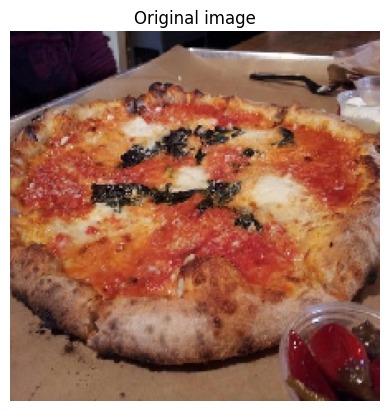

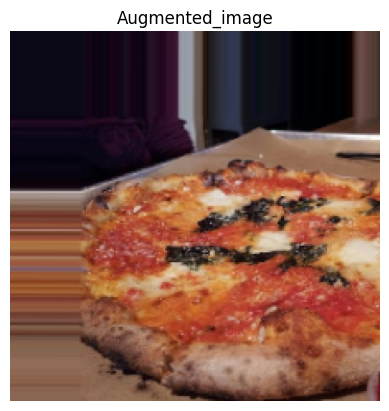

In [ ]:

# Show original image and augmented image
import random
rand_number=random.randint(0,30)
print(f"showing image with random number {rand_number}")
plt.imshow(images[rand_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[rand_number])
plt.title(f"Augmented_image")
plt.axis(False)

# let's build a model and see how it learns on augmented data

In [ ]:
model_6=tf.keras.Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")

])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

val_steps=min(len(valid_data),
10)
history_6=model_6.fit(train_data_augmented,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=valid_data,
                      validation_steps=val_steps)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 371ms/step - accuracy: 0.5984 - loss: 0.7306 - val_accuracy: 0.5000 - val_loss: 0.6855
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5167 - val_loss: 0.6788
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 38s 358ms/step - accuracy: 0.4732 - loss: 0.6983 - val_accuracy: 0.6219 - val_loss: 0.6691
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5667 - val_loss: 0.6772
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 358ms/step - accuracy: 0.4641 - loss: 0.6934 - val_accuracy: 0.5656 - val_loss: 0.6608


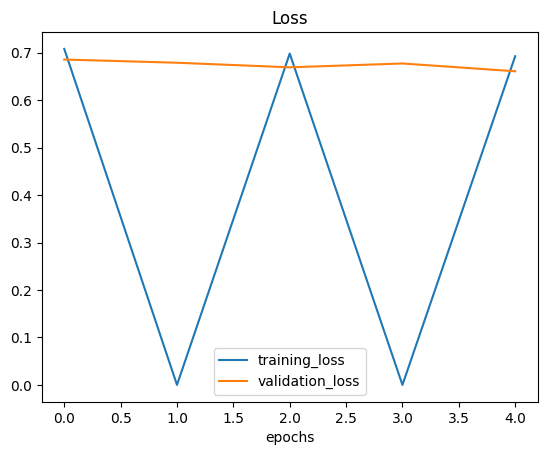

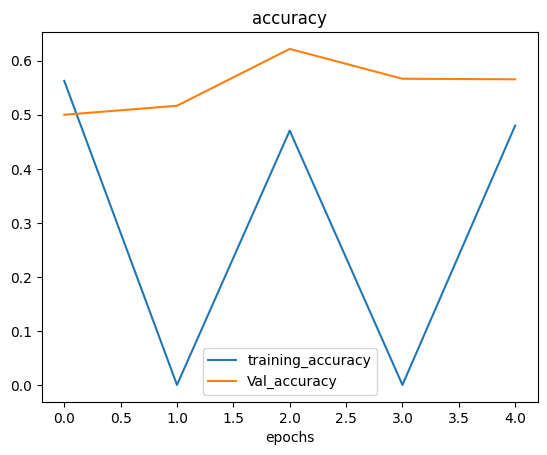

In [ ]:
plot_loss_curves(history_6)

In [ ]:
train_data_aug_shuffled=train_datagen_augmented.flow_from_directory(train_dir,
                                                                    target_size=(224,224),
                                                                    batch_size=32,
                                                                    class_mode="binary",
                                                                    shuffle=True)

Found 1500 images belonging to 2 classes.


Now we will try to build our model on the augmented as well as shuffled data let's see what happens


In [ ]:
model_7=tf.keras.Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])
val_steps=min(10,len(valid_data))

history_7=model_7.fit(train_data_aug_shuffled,
                      epochs=10,
                      steps_per_epoch=len(train_data_aug_shuffled),
                      validation_data=valid_data,
                      validation_steps=val_steps)

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 372ms/step - accuracy: 0.5454 - loss: 0.6860 - val_accuracy: 0.7219 - val_loss: 0.5552
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7222 - val_loss: 0.5432
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 37s 358ms/step - accuracy: 0.6633 - loss: 0.6175 - val_accuracy: 0.7719 - val_loss: 0.4614
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7833 - val_loss: 0.4719
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 374ms/step - accuracy: 0.7393 - loss: 0.5223 - val_accuracy: 0.8500 - val_loss: 0.3842
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8333 - val_loss: 0.4146
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 360ms/step - accuracy: 0.7216 - loss: 0.5339 - val_accuracy: 0.8375 - val_loss: 0.3730
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss

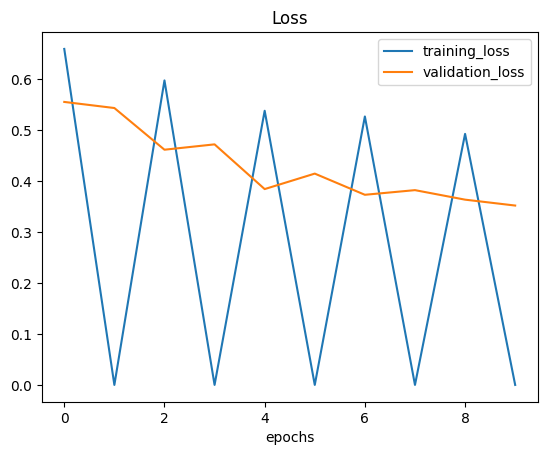

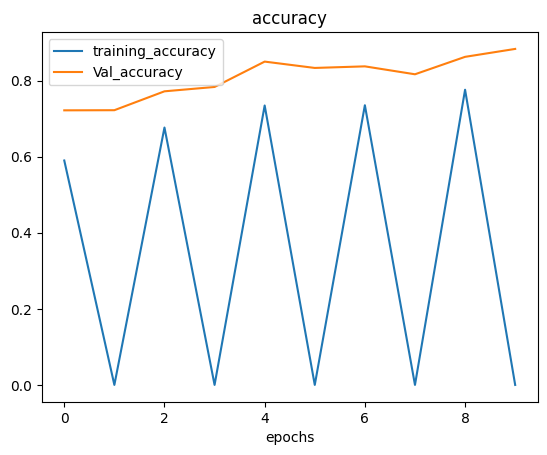

In [ ]:
plot_loss_curves(history_7)

When shuffling training data, the model gets exposed to all different kinds of data during trianing,thus enabling it to learn features across a wide array of images(in our case,pizza &steak at the same time instead of just pizza then
steak)

### 7. Repeat until satisfied
Since we've already beaten our baseline, there are few things we could try to continue to improve our model:

* Increase the number of model layers (eg. add more **Conv2D/ MaxPool2D**layers)
* Increase the number of filters in each convolutional layer(e.g. from 10 to 32 or even 64)
* Train for longer(more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **Transfer learning** to leverage what another image model has learn and adjust it for our own use case

In [ ]:
model_8 =tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])
val_steps=min(10,len(valid_data))

history_8=model_8.fit(train_data_aug_shuffled,
            epochs=5,
            steps_per_epoch=len(train_data_aug_shuffled),
            validation_data=valid_data,
            validation_steps=val_steps)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 382ms/step - accuracy: 0.5600 - loss: 0.6799 - val_accuracy: 0.5781 - val_loss: 0.6697
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6222 - val_loss: 0.6168
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 363ms/step - accuracy: 0.6850 - loss: 0.6135 - val_accuracy: 0.8062 - val_loss: 0.4159
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8167 - val_loss: 0.4469
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 369ms/step - accuracy: 0.7557 - loss: 0.5311 - val_accuracy: 0.8406 - val_loss: 0.3969


In [ ]:
print(class_names)

['pizza' 'steak']


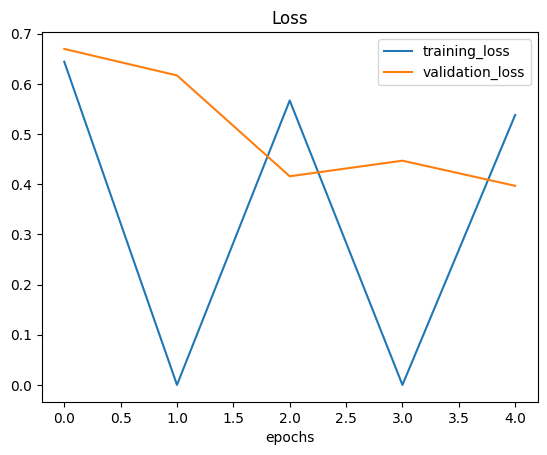

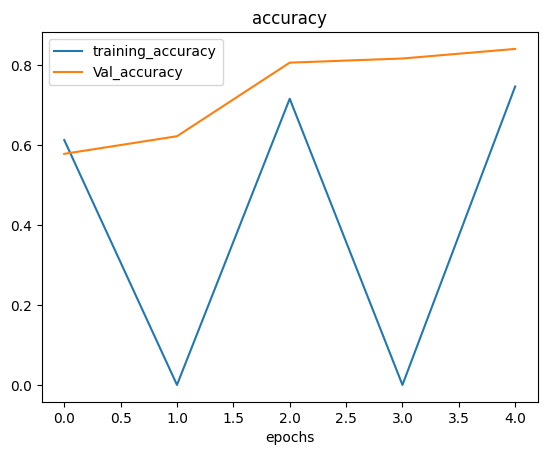

In [ ]:
plot_loss_curves(history_8)

## Performing evaluation on the Custom data

In [ ]:
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-steak.jpeg

--2024-10-13 16:59:46--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.05s   

2024-10-13 16:59:46 (40.5 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



In [ ]:
steak=mpimg.imread("03-steak.jpeg.1")

(-0.5, 3023.5, 4031.5, -0.5)

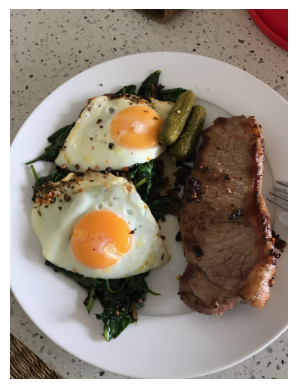

In [ ]:
plt.imshow(steak)
plt.axis(False)

In [ ]:
steak.shape

(4032, 3024, 3)

**Note** When you train a neural network and you want to amke a prediciton with it on your own custom data, it's important than your custom data(or new data) is preprocessed into the same format as the data your model was trained on.

In [ ]:
# Create an function to import and image and resize it to be able to be used with our model
def load_and_prep_image(filename,img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to (img_shape,
  img_shape,color_channels).
  """
  # Read in the image
  img=tf.io.read_file(filename)
  #Decode the read file into a tensor
  img=tf.image.decode_image(img)
  #Resize the img
  img=tf.image.resize(img,size=[img_shape,img_shape])
  img=img/225.
  return img

In [ ]:
steak=load_and_prep_image('03-steak.jpeg')

In [ ]:
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.7227778 , 0.705     , 0.6561111 ],
        [0.7372222 , 0.7161111 , 0.66833335],
        [0.7161111 , 0.6894444 , 0.63611114],
        ...,
        [0.5911111 , 0.05777778, 0.10222222],
        [0.5611111 , 0.04777778, 0.08      ],
        [0.5988889 , 0.08777778, 0.11888889]],

       [[0.75      , 0.7322222 , 0.69222224],
        [0.7238889 , 0.70611113, 0.6527778 ],
        [0.74333334, 0.71666664, 0.66333336],
        ...,
        [0.6066667 , 0.07777778, 0.10444444],
        [0.60055554, 0.06722222, 0.10722222],
        [0.5827778 , 0.06277778, 0.09833334]],

       [[0.73888886, 0.7211111 , 0.6677778 ],
        [0.72444445, 0.69555557, 0.6433333 ],
        [0.7438889 , 0.71055555, 0.66055554],
        ...,
        [0.6022222 , 0.07333333, 0.09111111],
        [0.5977778 , 0.07777778, 0.11333334],
        [0.5922222 , 0.05888889, 0.09888889]],

       ...,

       [[0.5588889 , 0.48444444, 0.35166666],
        [0.06

In [ ]:
model_8.predict(tf.expand_dims(steak,axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[0.8595661]], dtype=float32)

Look's like our custom image is being put through our model, it currently outputs a prediction probability,
wouldn't it be nice if we could visualize the image as well as the model's prediction

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We can index the predicted class by round the prediction probabilites and indexing it on the class_names
pred_class=class_names[int(tf.round(model_8.predict(tf.expand_dims(steak,axis=0))))]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [ ]:
pred_class

'steak'

In [ ]:
def pred_and_plot(model,filename,class_names=class_names):
  """
  Import an image located at filename,makes a prediction with model and plots the image
  with the predicted class as the title.
  """
  img=load_and_prep_image(filename)
  pred=model.predict(tf.expand_dims(img,axis=0))
  pred_class=class_names[int(tf.round(model_8.predict(tf.expand_dims(img,axis=0))))]
  # plot the image
  plt.imshow(img)
  plt.title(f"Prediction:{pred_class}")
  plt.axis(False)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


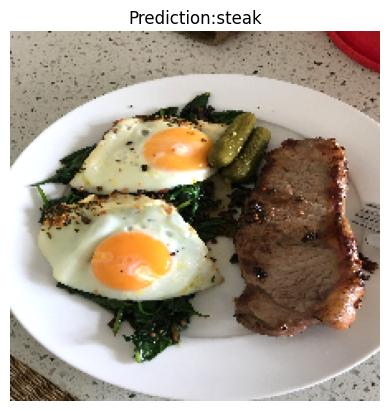

In [ ]:
pred_and_plot(model_8,"03-steak.jpeg",class_names)

In [ ]:
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-pizza-dad.jpeg

--2024-10-13 17:32:14--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2024-10-13 17:32:15 (56.1 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



In [ ]:
pizza=mpimg.imread("03-pizza-dad.jpeg")

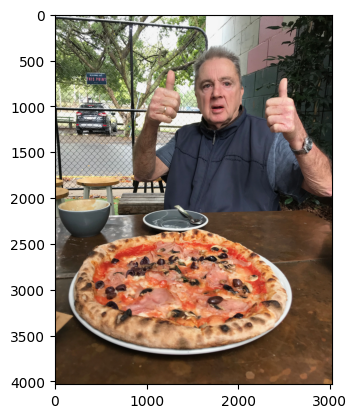

In [ ]:
plt.imshow(pizza)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


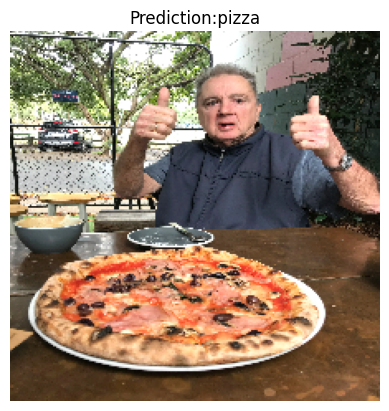

In [ ]:
pred_and_plot(model_8,"03-pizza-dad.jpeg",class_names)

In [ ]:
! wget https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT3RhAkXrDXaU8_tVgEFovixM6eCSLN3CJl5Q&s

/bin/bash: line 1: s: command not found
--2024-10-13 17:38:32--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT3RhAkXrDXaU8_tVgEFovixM6eCSLN3CJl5Q
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 74.125.137.139, 74.125.137.113, 74.125.137.100, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|74.125.137.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15928 (16K) [image/jpeg]
Saving to: ‘images?q=tbn:ANd9GcT3RhAkXrDXaU8_tVgEFovixM6eCSLN3CJl5Q’

images?q=tbn:ANd9Gc 100%[===================>]  15.55K  --.-KB/s    in 0s      

2024-10-13 17:38:32 (130 MB/s) - ‘images?q=tbn:ANd9GcT3RhAkXrDXaU8_tVgEFovixM6eCSLN3CJl5Q’ saved [15928/15928]



In [ ]:
pizza=mpimg.imread('new_pizza.jpeg')

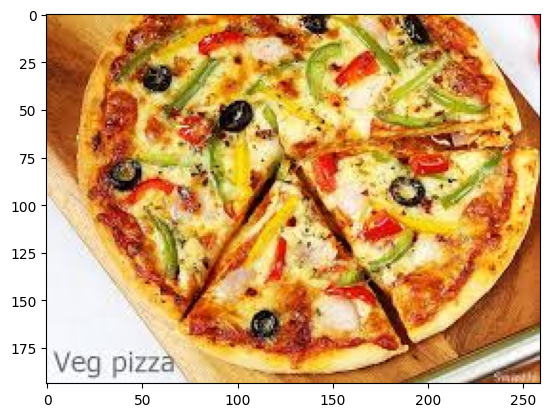

In [ ]:
plt.imshow(pizza)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


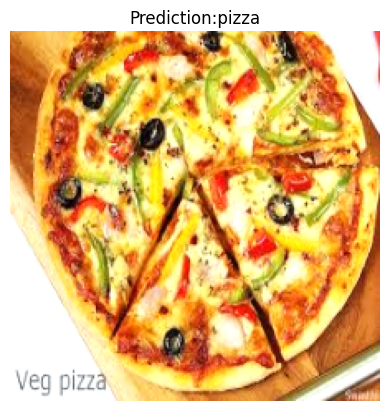

In [ ]:
pred_and_plot(model_8,"new_pizza.jpeg",class_names)